In [1]:
import numpy as np
import pandas as pd
from numpy.random import seed
seed(1)

import matplotlib.pyplot as plt
import seaborn as sns
from cycle_prediction.t2e import t2e
from cycle_prediction.weibull_utils import plot_top_predictions,weibull_pdf, weibull_mode

import pandas as pd
from matplotlib import gridspec
import seaborn as sns
import pickle
import pickle
import warnings
warnings.filterwarnings("ignore")
import os
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
# import sys
# sys.path.append('../cycle_prediction/')
# from weibull_utils import plot_predictions_insights
# from weibull_utils import plot_top_predictions,weibull_pdf, weibull_mode
# from t2e import t2e

In [3]:
b = pd.read_csv('b_modified.csv')
test_trace=pd.read_csv('test_case.csv')


df_name = {
    'b':'bpi_12_w',
}

df_dict = {
    'b': b,
}
range_dict = {
    'b': range(2,34,2),
}


dataset='b'
res='d'
censored=True
cen_per=0.5
fit_type:'t2e'
transform = False
prefix_dict = dict()
##########################################################
for prefix in range_dict[dataset]:
    print("\ndataset:", dataset, "\tprefix:", prefix)

    t2e_obj = t2e(df_dict[dataset],
                  prefix = prefix,
                  resolution = res,
                  censored = censored,
                  cen_prc = cen_per,
                  fit_type = 't2e',
                  transform = transform
                 )
    t2e_obj.preprocess_dev()
    X_train, X_test, X_val, y_train, y_test, y_val, len_train, len_val, len_test = t2e_obj.smart_split(train_prc = 0.7,
                                                                                                         val_prc = 0.45,
                                                                                                          scaling=True)
    print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

    print("Layer size:",8, end = " ..... ")
    t2e_obj.fit(X_train, y_train, X_val, y_val,size=8, vb = False)
    
    prefix_dict[str(prefix)] = {
        'cols':t2e_obj.dataset.columns,
        'sc':t2e_obj.sc,
        'model':t2e_obj.model
    }
    print("Prefix (", prefix, ") ... Done")


dataset: b 	prefix: 2


TypeError: __init__() got an unexpected keyword argument 'censored'

No. of cases 1
Prefix: 2 True remaining time 35.0


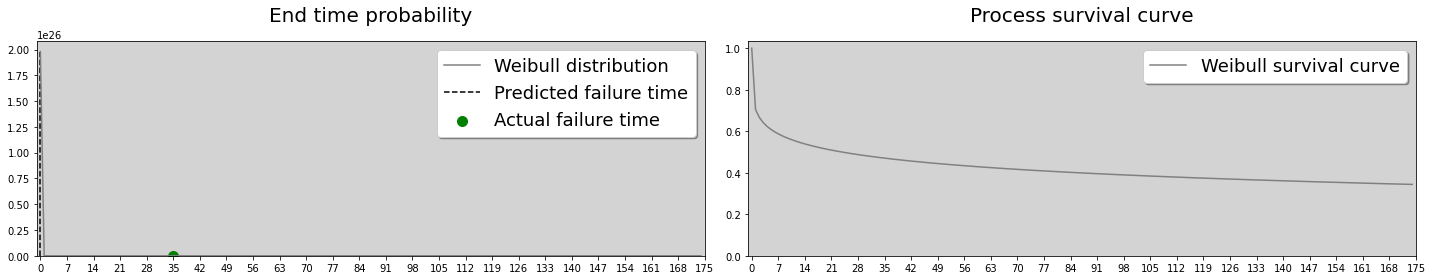

No. of cases 1
Prefix: 4 True remaining time 35.0


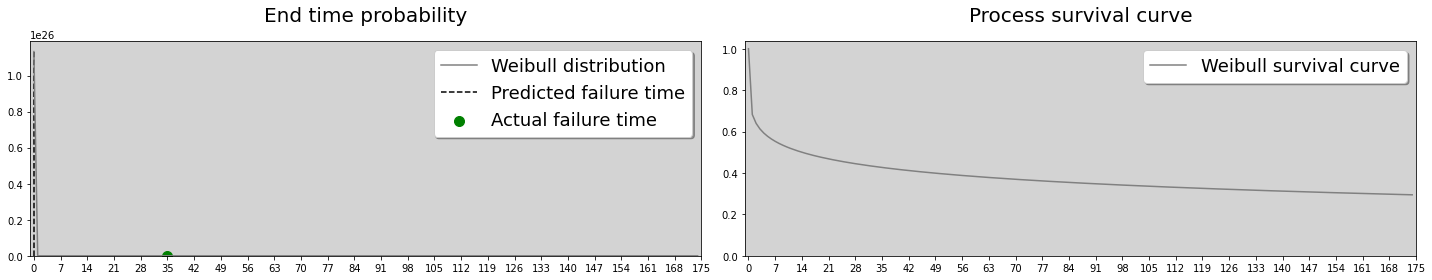

No. of cases 1
Prefix: 6 True remaining time 35.0


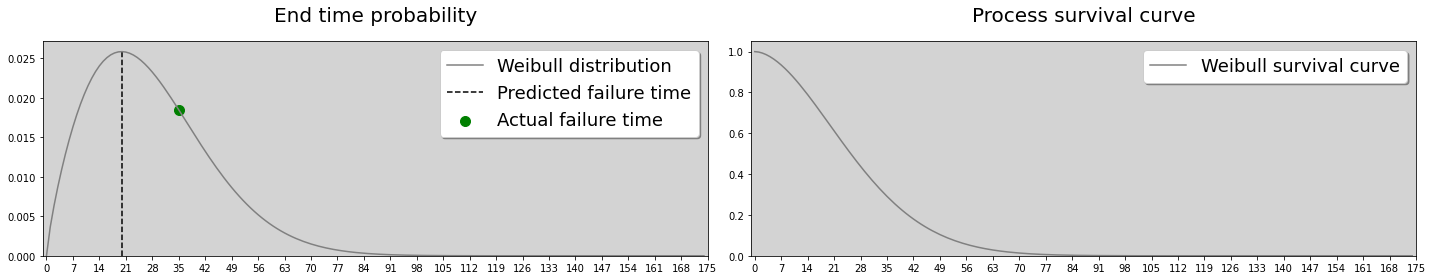

No. of cases 1
Prefix: 8 True remaining time 35.0


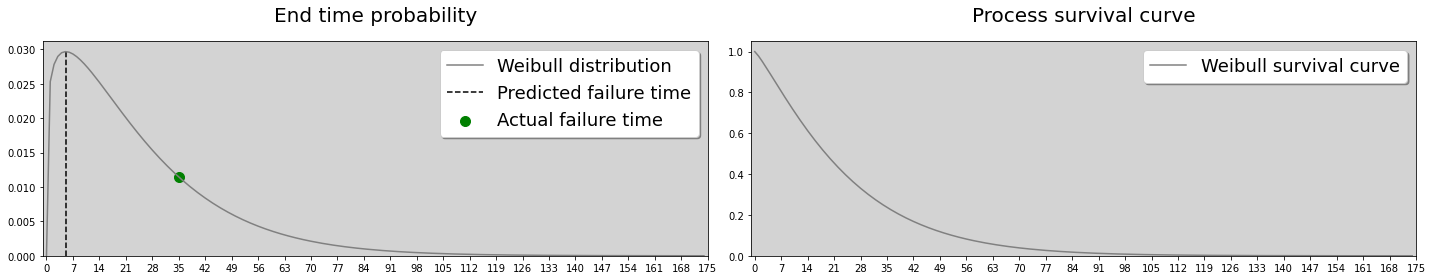

No. of cases 1
Prefix: 10 True remaining time 27.0


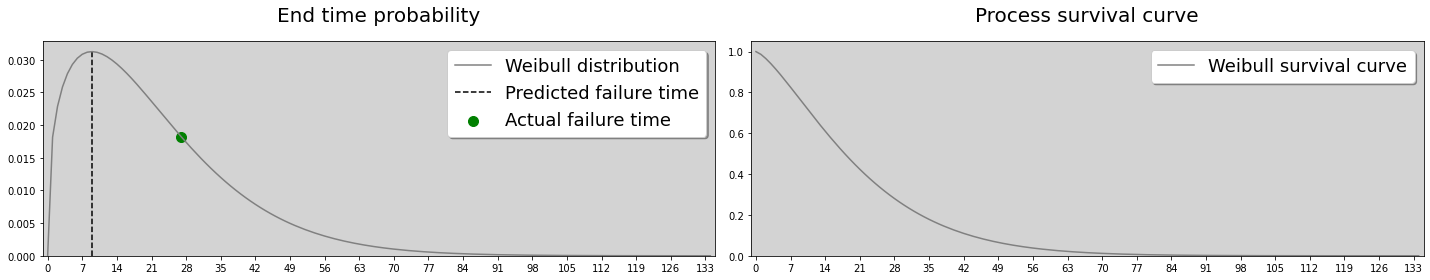

No. of cases 1
Prefix: 12 True remaining time 27.0


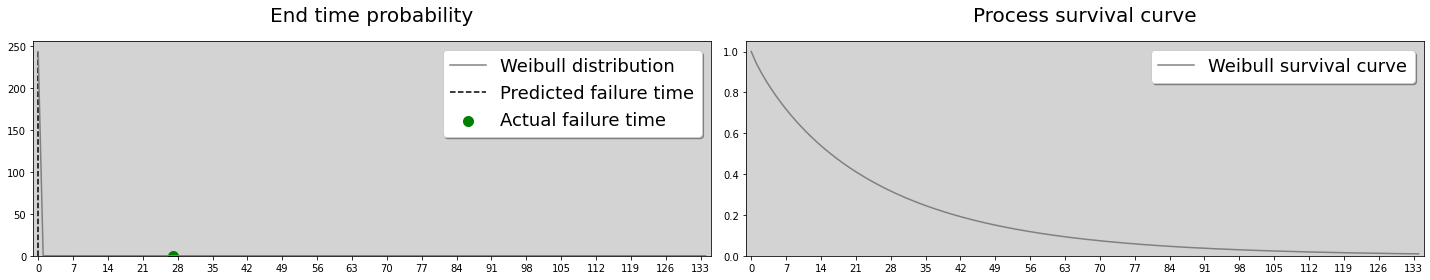

No. of cases 1
Prefix: 14 True remaining time 20.0


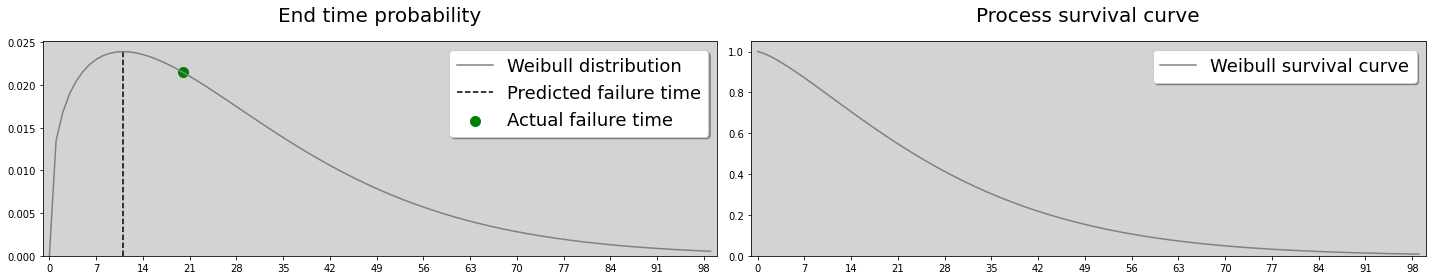

No. of cases 1
Prefix: 16 True remaining time 17.0


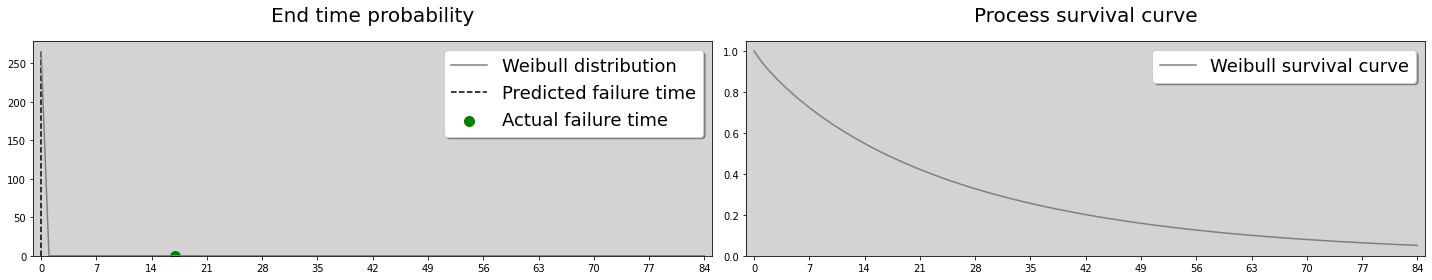

No. of cases 1
Prefix: 18 True remaining time 11.0


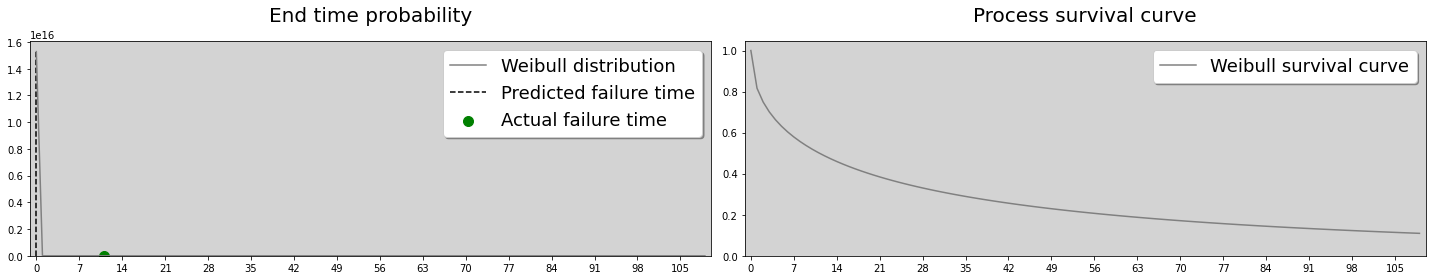

No. of cases 1
Prefix: 20 True remaining time 10.0


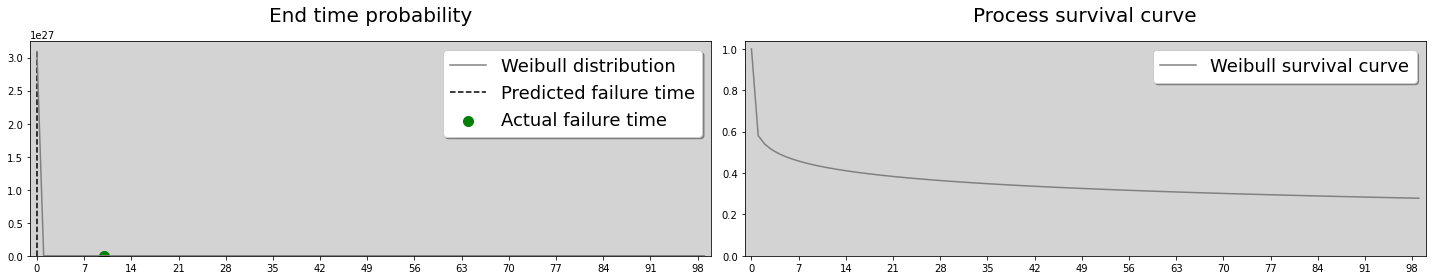

No. of cases 1
Prefix: 22 True remaining time 10.0


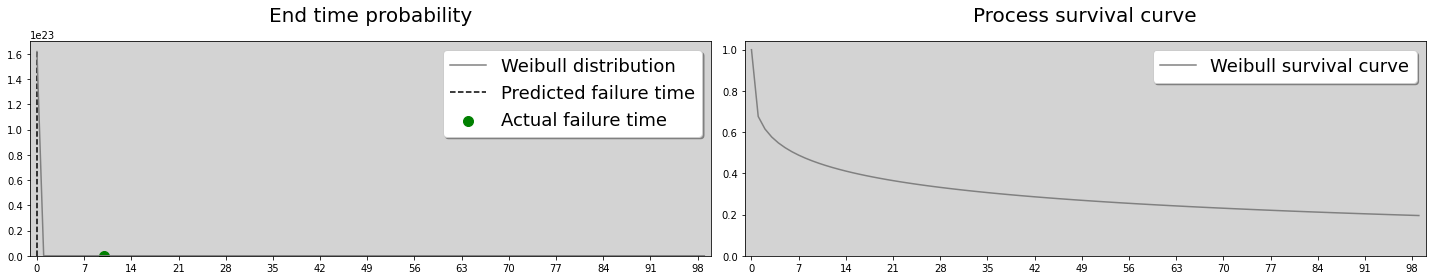

No. of cases 1
Prefix: 24 True remaining time 10.0


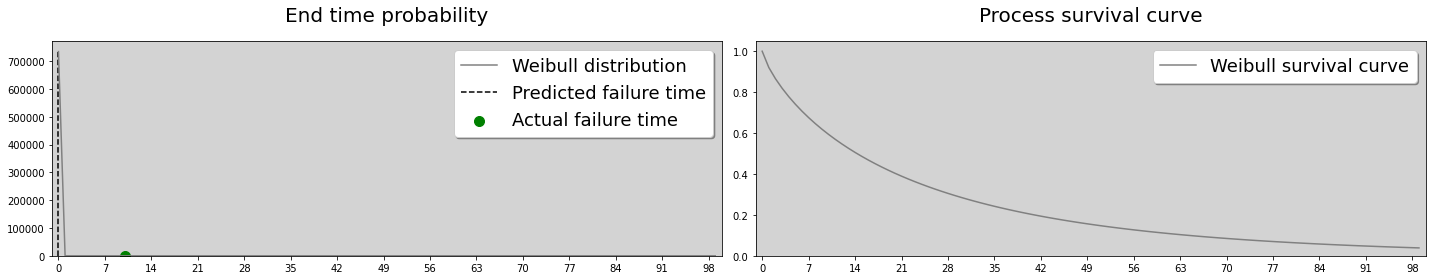

No. of cases 1
Prefix: 26 True remaining time 6.0


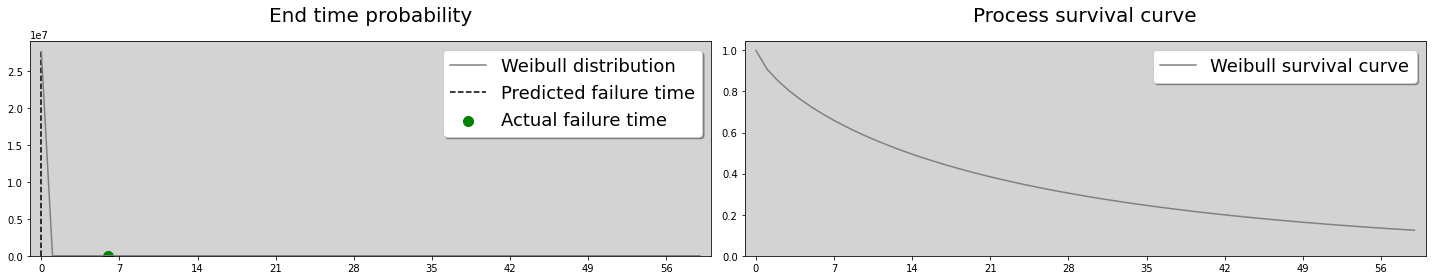

No. of cases 1
Prefix: 28 True remaining time 6.0


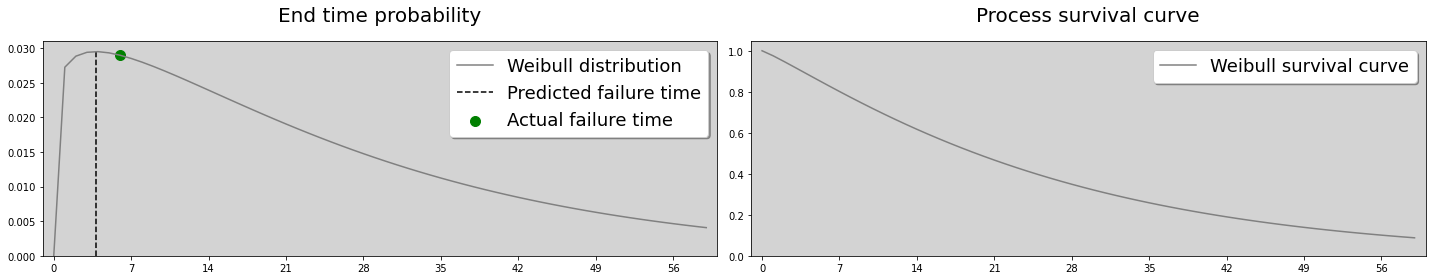

No. of cases 1
Prefix: 30 True remaining time 5.0


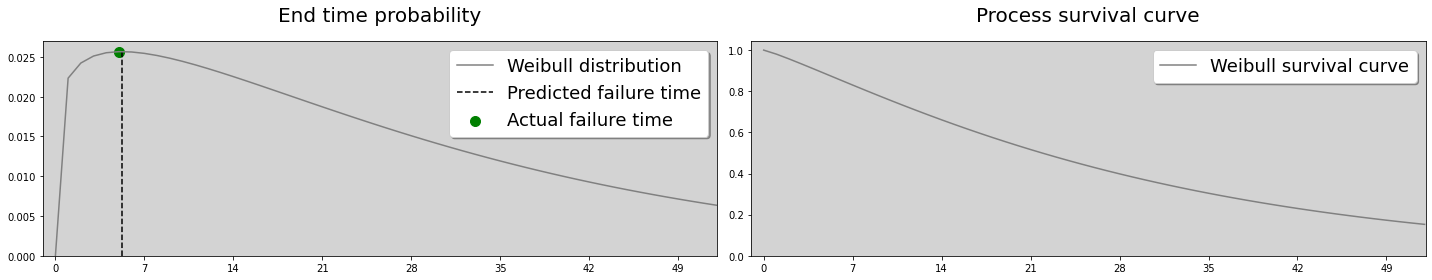

No. of cases 1
Prefix: 32 True remaining time 3.0


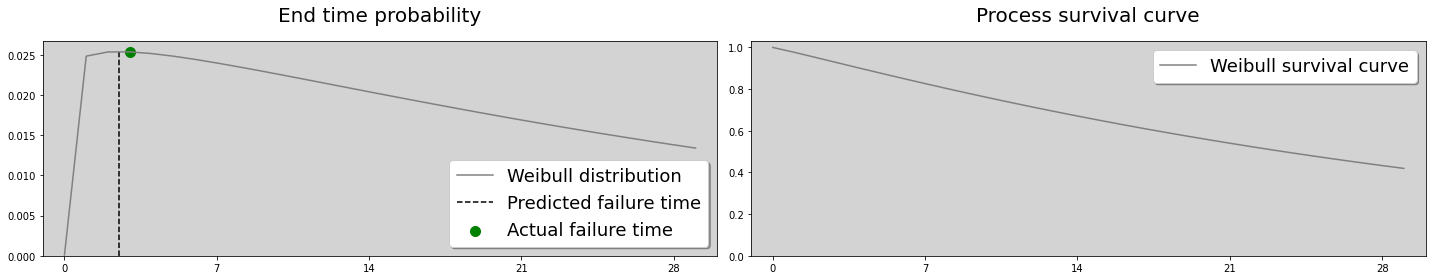

In [11]:
resolution='d'

for prefix in range_dict[dataset]:
    test_t2e = t2e(
        test_trace,
        prefix,
        resolution,
        end_event_list=[6],
        transform=False,
        fit_type='t2e',
    )

    test_t2e.preprocess()

    missing_cols = set( prefix_dict[str(prefix)]['cols'] ) - set( test_t2e.dataset.columns )
    for col in missing_cols:
        test_t2e.dataset[col] = 0
    test_t2e.dataset = test_t2e.dataset[prefix_dict[str(prefix)]['cols']]

    test_t2e.sc = prefix_dict[str(prefix)]['sc']
    test_t2e.model = prefix_dict[str(prefix)]['model']
    X, y = test_t2e.xy_split(scaling=True)

    eval_df, mae = test_t2e.evaluate(X,y)
    print("Prefix:",prefix, "True remaining time", y[0][0])
    plot_top_predictions(eval_df,lim=1)